## Task 1: Cityscapes JSON to YOLO

In [1]:
import json
import cv2
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
labelToId = {
    "road" : 7,
    "sidewalk" : 8,
    "building" : 11,
    "wall" : 12,
    "fence" : 13,
    "pole" : 17,
    "traffic light" : 19,
    "traffic sign" : 20,
    "vegetation" : 21,
    "terrain" : 22,
    "person" : 24,
    "rider" :25,
    "car" : 26,
    "truck" : 27,
    "bus" : 28,
    "train" : 31,
    "motorcycle" : 32,
    "bicycle" : 33,
}
idToLabel = {v: k for k, v in labelToId.items()}


In [3]:
yoloFile = open("/home/frank/Desktop/HapticVisionModel/cityScapeYoloSeg/data/cityscapes/gtFine/test/frankfurt_000000_000294_gtFine_polygons.txt", "w")
jsonFile = open('/home/frank/Desktop/HapticVisionModel/cityScapeYoloSeg/data/cityscapes/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_polygons.json')
data = json.load(jsonFile)

height = data['imgHeight']
width = data['imgWidth']
for segmentData in data['objects']:
    if segmentData['label'] not in trainingIds:
        continue
    label = str(trainingIds[segmentData['label']])
    polygon = ""
    for polygonPt in segmentData['polygon']:
        polygon += str(polygonPt[0]/width) + ' ' + str(polygonPt[1]/height) + ' '
    yoloFile.write(label + " " + polygon +"\n")

jsonFile.close()
yoloFile.close()

NameError: name 'trainingIds' is not defined

0

In [12]:
img = cv2.imread('/home/frank/Desktop/HapticVisionModel/cityScapeYoloSeg/data/cityscapes/gtFine/val/frankfurt/frankfurt_000000_000576_gtFine_instanceIds.png', cv2.IMREAD_UNCHANGED)
colourImg = cv2.imread('/home/frank/Desktop/HapticVisionModel/cityScapeYoloSeg/data/cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_000576_leftImg8bit.png', cv2.IMREAD_UNCHANGED)
img = img[10:800, 10:-10]
colourImg = colourImg[10:800, 15:-10]
print(img.shape)
print(img.shape)
print(np.unique(img))

for obj in np.unique(26010):
    if obj not in idToLabel and obj//1000 not in idToLabel:
        continue
    binaryMask = img.copy()
    binaryMask[binaryMask != obj] = 0
    binaryMask[binaryMask == obj] = 1
    binaryMask = binaryMask.astype(np.uint8)
    ret, thresh = cv2.threshold(binaryMask,50,255,50)
    print(np.unique(thresh))
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, 0.0001*cv2.arcLength(cnt, True), True)
        area = cv2.contourArea(approx)
        print(area)
        if len(approx) >= 5 and area > 400:
            img = cv2.drawContours(colourImg, [approx], -1, (0,255,255), 3)
        approx = np.array(approx)
        approx = np.reshape(approx, (approx.shape[0], approx.shape[2]))
        # print(approx)
    cv2.imshow("Polygon", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # plt.imshow(thresh, cmap='gray')
    # plt.imshow(binaryMask)
    # if obj > 1000:
    #     plt.title(idToLabel[obj//1000] + ' Instance: ' + str(obj%1000))
    # else:
    #     plt.title(idToLabel[obj])
    # plt.show()

(790, 2028)
(790, 2028)
[    1     2     4     7     8     9    11    13    17    20    21    23
    26 25000 25001 26000 26001 26002 26003 26004 26005 26006 26007 26008
 26009 26010 26011 26012 26013 26014 26015 26016 33000 33001]
[0 1]
1
1969.0


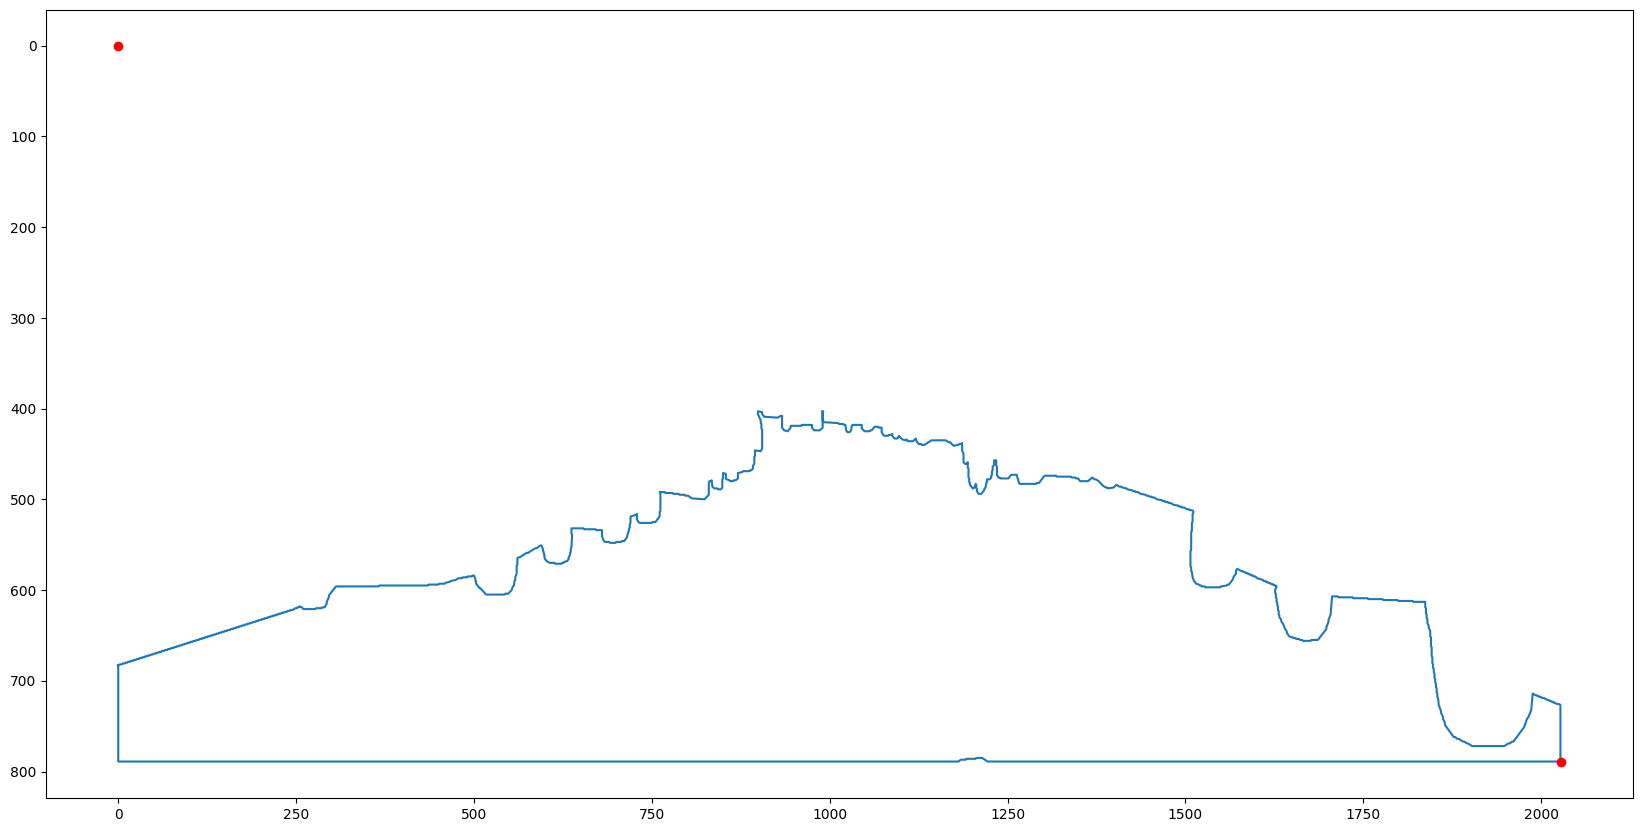

In [38]:
import matplotlib.pyplot as plt
#repeat the first point to create a 'closed loop'
test = approx
test = np.concatenate((test, [approx[0]]))
bottom = [0, 2028]
top = [0, 790]
xs, ys = zip(*test) #create lists of x and y values
plt.rcParams["figure.autolayout"] = False
plt.figure(figsize=(20.48, 10.24))
plt.gca().invert_yaxis()
plt.plot(xs,ys) 
plt.plot(bottom,top,'ro')
plt.show() # if you need...